In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

posts_list = pd.read_pickle('posts_investing_year.pkl')

df = pd.DataFrame(posts_list)

In [2]:
df.columns

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_patreon_flair',
       'awarders', 'can_mod_post', 'contest_mode', 'created_utc', 'domain',
       'full_link', 'gildings', 'id', 'is_crosspostable', 'is_meta',
       'is_original_content', 'is_reddit_media_domain', 'is_robot_indexable',
       'is_self', 'is_video', 'link_flair_background_color',
       'link_flair_richtext', 'link_flair_text_color', 'link_flair_type',
       'locked', 'media_only', 'no_follow', 'num_comments', 'num_crossposts',
       'over_18', 'parent_whitelist_status', 'permalink', 'pinned', 'pwls',
       'retrieved_on', 'score', 'selftext', 'send_replies', 'spoiler',
       'steward_reports', 'stickied', 'subreddit', 'subreddit_id',
       'subreddit_subscribers', 'subreddit_type', 'thumbnail', 'title',
       'total_awards_received', 'url', 'whitelist_status', 'wls', 'remo

In [3]:
#create a new type for df
df['text'] = df['title'] + ' ' + df['selftext']


In [4]:
df['text']

0        Suggested readings for new investor Hi r/inves...
1        Charles Schwab vs M1 vs Robinhood I’ve had a R...
2        Are you guys maxing out your IRAs Jan 1? With ...
3        Short Stock Question Let’s say you have 50k. I...
4        If you had a 100k cash, what would you do with...
                               ...                        
27995    Is this a bad idea: buying/holding inverse S&a...
27996    Rent/bills due by the 26 and still need 400EUR...
27997    Invested in a company, can't contact, no news,...
27998    Rent/bills due by the 26 and still need 400EUR...
27999    Can certain or a few bunch of stocks make mone...
Name: text, Length: 28000, dtype: object

In [23]:
stop_words = set(stopwords.words('english'))
new_stop_words = set(['removed','x200b', 'amp', 'hi', 'like', 'get'])
stop_words = stop_words.union(new_stop_words)
corpus = []
tokenizer = RegexpTokenizer(r'\w+')
for x in df['text']:
    text = str(x).lower()
    text = tokenizer.tokenize(re.sub(r'https?://\S+', '', text))
    ps=PorterStemmer()
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [25]:
list(cv.vocabulary_.keys())[:10]

['suggested',
 'reading',
 'new',
 'investor',
 'investing',
 'looking',
 'learn',
 'particularly',
 'respect',
 'stock']

[Text(0, 0, 'stock'),
 Text(0, 0, 'year'),
 Text(0, 0, 'market'),
 Text(0, 0, 'would'),
 Text(0, 0, 'company'),
 Text(0, 0, 'fund'),
 Text(0, 0, 'money'),
 Text(0, 0, 'investing'),
 Text(0, 0, 'time'),
 Text(0, 0, 'investment'),
 Text(0, 0, 'invest'),
 Text(0, 0, 'share'),
 Text(0, 0, 'buy'),
 Text(0, 0, 'know'),
 Text(0, 0, 'account'),
 Text(0, 0, 'one'),
 Text(0, 0, 'price'),
 Text(0, 0, 'etf'),
 Text(0, 0, 'good'),
 Text(0, 0, 'investor')]

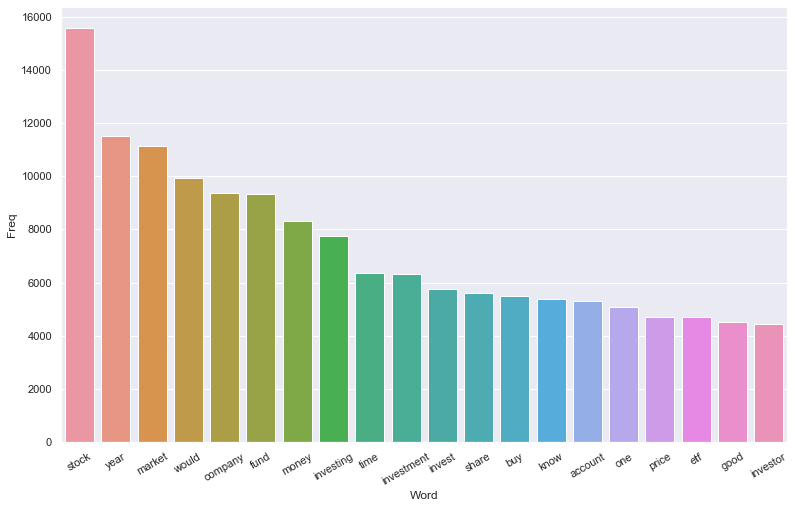

In [26]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

           Bi-gram  Freq
0        long term  2051
1     stock market  1886
2       index fund  1615
3         roth ira  1462
4      mutual fund  1354
5    interest rate  1039
6      real estate  1002
7         year old   905
8          10 year   801
9       short term   704
10          10 000   658
11       last year   648
12     stock price   540
13       next year   538
14  saving account   534
15        year ago   524
16      make money   499
17       per share   497
18           gt gt   495
19   new investing   490


[Text(0, 0, 'long term'),
 Text(0, 0, 'stock market'),
 Text(0, 0, 'index fund'),
 Text(0, 0, 'roth ira'),
 Text(0, 0, 'mutual fund'),
 Text(0, 0, 'interest rate'),
 Text(0, 0, 'real estate'),
 Text(0, 0, 'year old'),
 Text(0, 0, '10 year'),
 Text(0, 0, 'short term'),
 Text(0, 0, '10 000'),
 Text(0, 0, 'last year'),
 Text(0, 0, 'stock price'),
 Text(0, 0, 'next year'),
 Text(0, 0, 'saving account'),
 Text(0, 0, 'year ago'),
 Text(0, 0, 'make money'),
 Text(0, 0, 'per share'),
 Text(0, 0, 'gt gt'),
 Text(0, 0, 'new investing')]

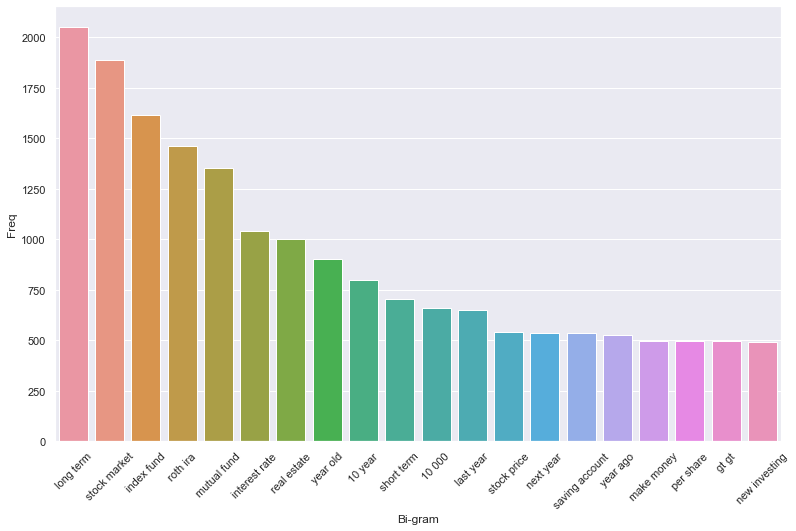

In [27]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                     Tri-gram  Freq
0             need money next   378
1             money buy house   377
2      employed making income   376
3          making income much   376
4         risk tolerance mind   376
5              house paid car   376
6         objective money buy   375
7        buy house retirement   375
8     house retirement saving   375
9      tolerance mind risking   375
10     mind risking blackjack   375
11     risking blackjack need   375
12        blackjack need know   375
13              need know 100   375
14              know 100 safe   375
15    current holding already   375
16   holding already exposure   375
17  already exposure specific   375
18     exposure specific fund   375
19       specific fund sector   375


[Text(0, 0, 'need money next'),
 Text(0, 0, 'money buy house'),
 Text(0, 0, 'employed making income'),
 Text(0, 0, 'making income much'),
 Text(0, 0, 'risk tolerance mind'),
 Text(0, 0, 'house paid car'),
 Text(0, 0, 'objective money buy'),
 Text(0, 0, 'buy house retirement'),
 Text(0, 0, 'house retirement saving'),
 Text(0, 0, 'tolerance mind risking'),
 Text(0, 0, 'mind risking blackjack'),
 Text(0, 0, 'risking blackjack need'),
 Text(0, 0, 'blackjack need know'),
 Text(0, 0, 'need know 100'),
 Text(0, 0, 'know 100 safe'),
 Text(0, 0, 'current holding already'),
 Text(0, 0, 'holding already exposure'),
 Text(0, 0, 'already exposure specific'),
 Text(0, 0, 'exposure specific fund'),
 Text(0, 0, 'specific fund sector')]

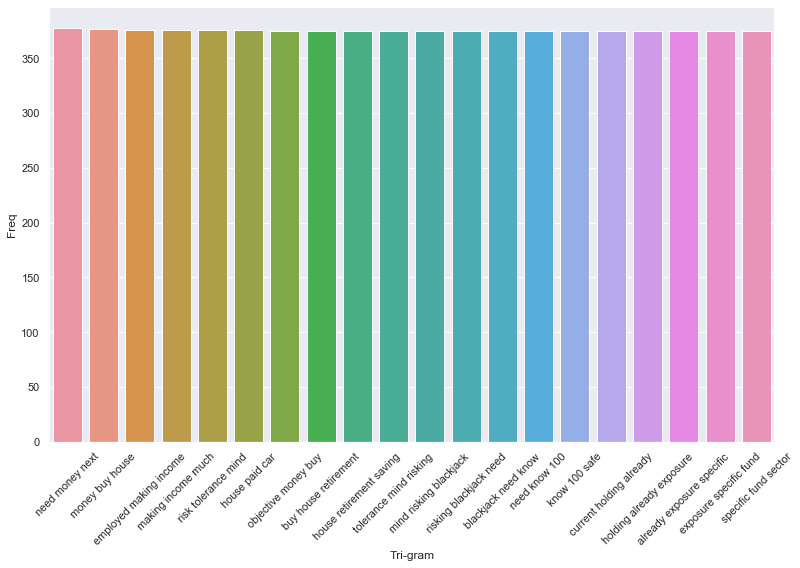

In [28]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [29]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[532]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [53]:
from sklearn.feature_extraction.text import TfidfTransformer
import random 
import time
random.seed(time.time())

 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
count = 0
for x in corpus:
    # fetch document for which keywords needs to be extracted
    doc=x

    #generate tf-idf for the given document
    tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))
    #Function for sorting tf_idf in descending order
    from scipy.sparse import coo_matrix
    def sort_coo(coo_matrix):
        tuples = zip(coo_matrix.col, coo_matrix.data)
        return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

    def extract_topn_from_vector(feature_names, sorted_items, topn=10):
        """get the feature names and tf-idf score of top n items"""

        #use only topn items from vector
        sorted_items = sorted_items[:topn]

        score_vals = []
        feature_vals = []

        # word index and corresponding tf-idf score
        for idx, score in sorted_items:

            #keep track of feature name and its corresponding score
            score_vals.append(round(score, 3))
            feature_vals.append(feature_names[idx])

        #create a tuples of feature,score
        #results = zip(feature_vals,score_vals)
        results= {}
        for idx in range(len(feature_vals)):
            results[feature_vals[idx]]=score_vals[idx]

        return results
    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())
    #extract only the top n; n here is 10
    keywords=extract_topn_from_vector(feature_names,sorted_items,5)
    
    #list of desired keywords
    market_key_words = set(['market','stock', 'term', 'calls', 'puts', 'invest', 'roth', 'buy', 'sell', 'growth', 'etf', 'dow', 'short term', 'stock market'])
    # now print the results
    found = 0
    for k in keywords:
        if(found == 0):
            for m in market_key_words:
                if(m == k):
                    count+=1
                    found = 1
                    break
print(count)

2525
